# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [13]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x):
    return np.exp(x)*np.log(x)

def f2(x):
    return math.sin(x)*np.log(x)

In [14]:
def montecarlo1(f, a, b, N):
    u=np.random.uniform(a, b, size=1)
    return np.mean(f(u))*(b-a)

In [15]:
N= np.logspace(1, 4, 4)
tabla= pd.DataFrame(index=N, columns=["f1", "f2"])
tabla

,f1,f2
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN


In [16]:
a= 1
b= 3

for n in N:
    tabla.loc[n, "f1"]= montecarlo1(f1, a, b, int(n))
    tabla.loc[n, "f2"]= montecarlo1(f2, a, b, int(n))
    
tabla

,f1,f2
10.0,1.417668,0.359827
100.0,1.650994,0.578638
1000.0,2.688851,0.126183
10000.0,30.705789,1.149819


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def region(x, y) :
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

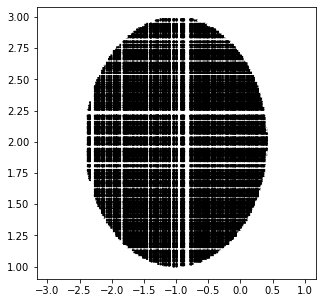

In [8]:
a1, b1 = -3, 1
a2, b2 = 1, 3

x = np.random.uniform(a1, b1, size=300)
y = np.random.uniform(a2, b2, size=300)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, c=~region(X, Y), cmap="gray", s=1)

In [9]:
def montecarlo2(region, a1, b1, a2, b2, N) :
    x = np.random.uniform(a1, b1, size=N)
    y = np.random.uniform(a2, b2, size=N)
    AR = (b1-a1)*(b2-a2)
    B = region(x, y)
    return np.mean(B)*AR

In [10]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(index=N, columns=["Area"])
tabla

,Area
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN
100000.0,NaN


In [11]:
for n in N :
    tabla.loc[n, "Area"] = montecarlo2(region, a1, b1, a2, b2, int(n))
tabla

,Area
10.0,4.0
100.0,4.56
1000.0,4.52
10000.0,4.4288
100000.0,4.44192
